# Sales Analysis and Forecasting Project

In this project, I analyze historical sales data to:
- Understand monthly sales trends
- Identify the best performing months, products, and categories
- Measure year-over-year growth
- Build time series models (ARIMA and SARIMA) to forecast the next 12 months of sales
- Provide business insights and recommendations based on the results

## 1. Monthly Sales Analysis

This section includes:
- Line and bar charts of monthly sales
- Best selling month across all years
- Best selling month for each year
- Year-over-year growth analysis

In [ ]:
monthly_sales = df.groupby("Month")["Sales"].sum().reset_index()
monthly_sales


,Month,Sales
0,2015-01,14205.7070
1,2015-02,4519.8920
2,2015-03,55205.7970
3,2015-04,27906.8550
4,2015-05,23644.3030
5,2015-06,34322.9356
6,2015-07,33781.5430
7,2015-08,27117.5365
8,2015-09,81623.5268
9,2015-10,31453.3930


In [ ]:
monthly_sales = monthly_sales.sort_values("Month")
monthly_sales

,Month,Sales
0,2015-01,14205.7070
1,2015-02,4519.8920
2,2015-03,55205.7970
3,2015-04,27906.8550
4,2015-05,23644.3030
5,2015-06,34322.9356
6,2015-07,33781.5430
7,2015-08,27117.5365
8,2015-09,81623.5268
9,2015-10,31453.3930


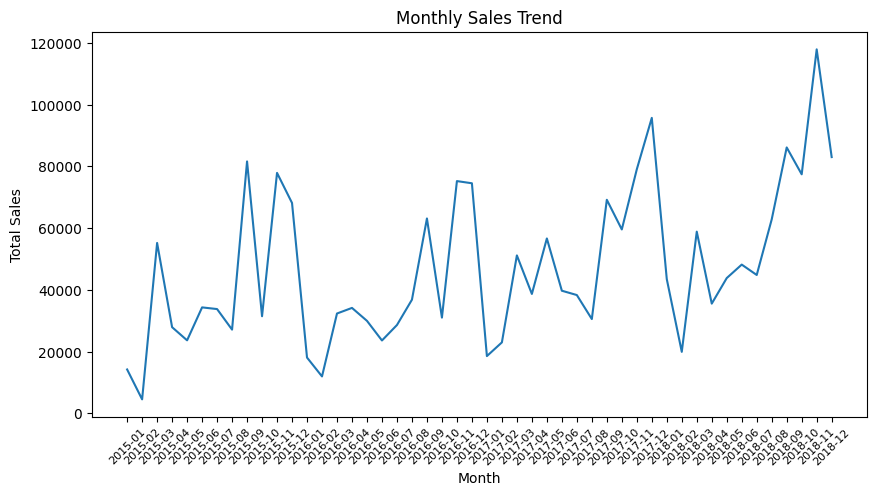

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales["Month"].astype(str), monthly_sales["Sales"])
plt.xticks(rotation=45, fontsize=8)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [ ]:
df["Year"] = df["Order Date"].dt.year
df["Month_num"] = df["Order Date"].dt.month
df["Month_name"] = df["Order Date"].dt.strftime("%b")

In [ ]:
monthly_sales = df.groupby(["Year", "Month_num", "Month_name"])["Sales"].sum().reset_index()
monthly_sales = monthly_sales.sort_values(["Year", "Month_num"])

In [ ]:
df.drop(["Year", "Month_num", "Month_name"], axis=1, inplace=True)

In [ ]:
df["Year"] = df["Order Date"].dt.year
df["Month_num"] = df["Order Date"].dt.month
df["Month_name"] = df["Order Date"].dt.strftime("%b")

In [ ]:
pivot = df.pivot_table(
    index="Month_name",
    columns="Year",
    values="Sales",
    aggfunc="sum"
).reindex(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
pivot

Year,2015,2016,2017,2018
Month_name,,,,
Jan,14205.7070,18066.9576,18542.4910,43476.4740
Feb,4519.8920,11951.4110,22978.8150,19920.9974
Mar,55205.7970,32339.3184,51165.0590,58863.4128
Apr,27906.8550,34154.4685,38679.7670,35541.9101
May,23644.3030,29959.5305,56656.9080,43825.9822
Jun,34322.9356,23599.3740,39724.4860,48190.7277
Jul,33781.5430,28608.2590,38320.7830,44825.1040
Aug,27117.5365,36818.3422,30542.2003,62837.8480
Sep,81623.5268,63133.6060,69193.3909,86152.8880


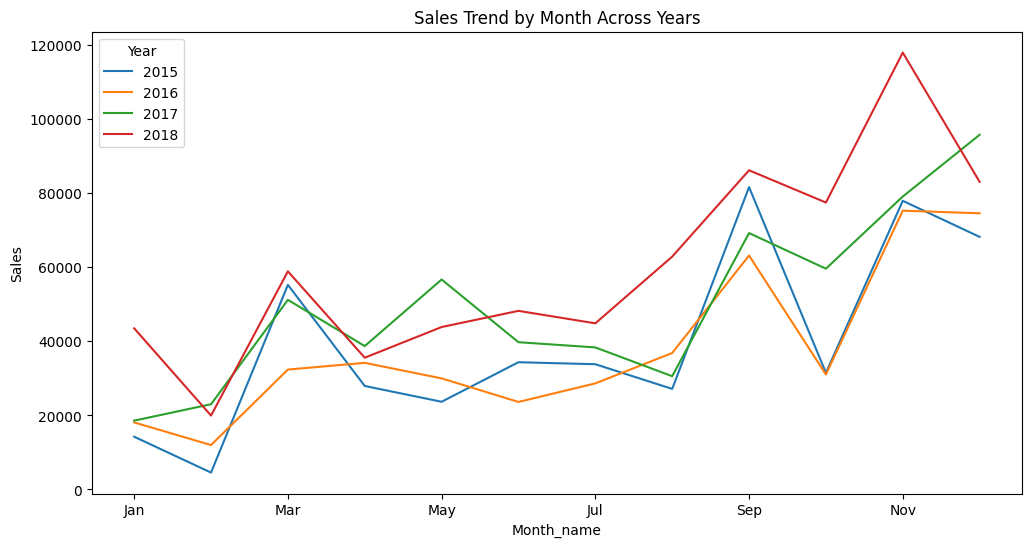

In [ ]:
pivot.plot(figsize=(12,6))
plt.xticks(rotation=0, fontsize=10)
plt.title("Sales Trend by Month Across Years")
plt.ylabel("Sales")
plt.show()

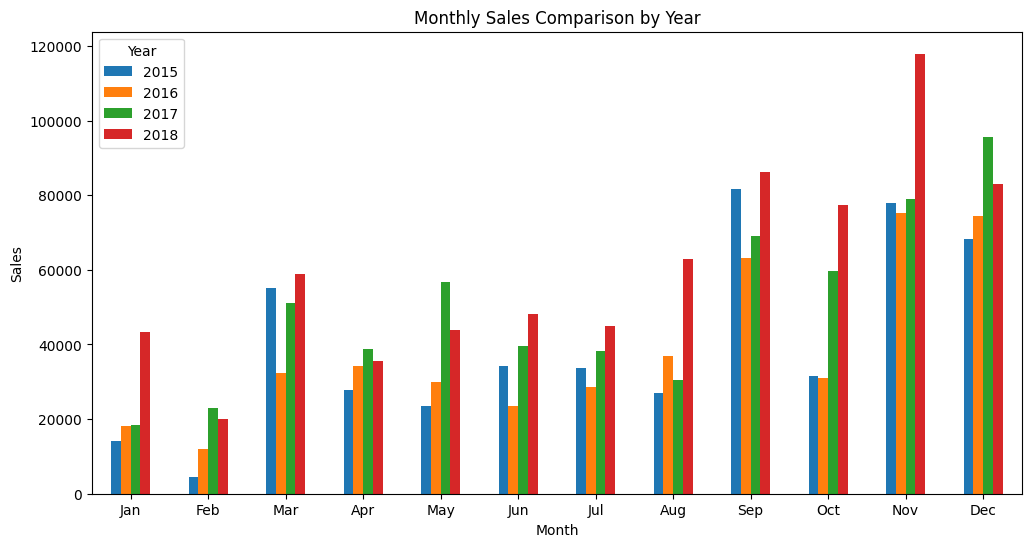

In [ ]:
# Step 1: Create grouped monthly sales
monthly_sales = df.groupby(["Year", "Month_num", "Month_name"])["Sales"].sum().reset_index()
monthly_sales = monthly_sales.sort_values(["Year", "Month_num"])


# Step 2: Create pivot table
pivot = monthly_sales.pivot(index="Month_num", columns="Year", values="Sales")


# Step 3: Sort row index so months are in correct order
pivot = pivot.sort_index()


# Step 4: Replace month numbers with month names
pivot.index = monthly_sales.drop_duplicates("Month_num").sort_values("Month_num")["Month_name"].values


# Step 5: Plot
pivot.plot(kind="bar", figsize=(12,6))
plt.xticks(rotation=0, fontsize=10)
plt.title("Monthly Sales Comparison by Year")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(title="Year")
plt.show()

In [ ]:
best_month = monthly_sales.groupby("Month_name")["Sales"].sum().sort_values(ascending=False)
best_month

,Sales
Month_name,
Nov,350161.7110
Dec,321480.1695
Sep,300103.4117
Oct,199496.2947
Mar,197573.5872
Aug,157315.9270
May,154086.7237
Jun,145837.5233
Jul,145535.6890


In [ ]:
best_month_year = monthly_sales.loc[
    monthly_sales.groupby("Year")["Sales"].idxmax(),
    ["Year", "Month_name", "Sales"]
]

best_month_year

,Year,Month_name,Sales
8,2015,Sep,81623.5268
22,2016,Nov,75249.3995
35,2017,Dec,95739.1210
46,2018,Nov,117938.1550


In [ ]:
yearly_sales = df.groupby("Year")["Sales"].sum()
yearly_growth = yearly_sales.pct_change() * 100

yearly_sales, yearly_growth

(Year
 2015    479856.2081
 2016    459436.0054
 2017    600192.5500
 2018    722052.0192
 Name: Sales, dtype: float64,
 Year
 2015          NaN
 2016    -4.255484
 2017    30.636812
 2018    20.303396
 Name: Sales, dtype: float64)

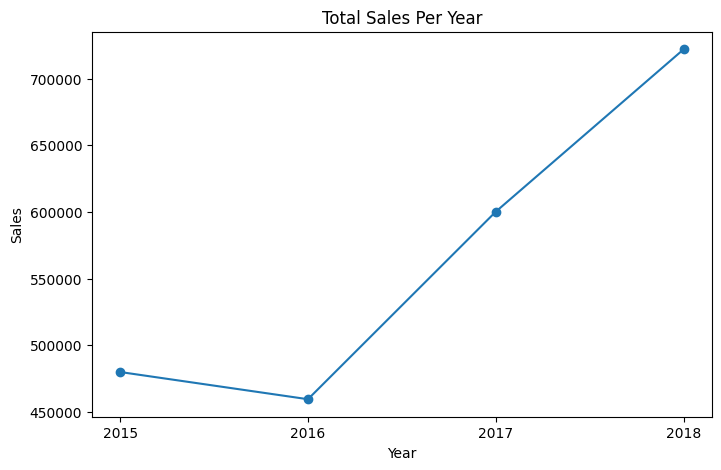

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.xticks(yearly_sales.index)
plt.title("Total Sales Per Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

In [ ]:
# Generate insights
overall_best = best_month.idxmax()
overall_best_value = best_month.max()

worst_month = best_month.idxmin()
worst_month_value = best_month.min()

best_by_year_text = "\n".join([
    f"• In {row['Year']}, the highest sales were in {row['Month_name']} with {row['Sales']:.2f} units/value."
    for _, row in best_month_year.iterrows()
])

growth_text = "\n".join([
    f"• From {yearly_growth.index[i-1]} → {yearly_growth.index[i]}: {yearly_growth.iloc[i]:.2f}% change"
    for i in range(1, len(yearly_growth))
])

# Combine into a readable report
report = f"""
📢 **Sales Performance Insights Summary**

⭐ **Best Performing Month Overall**
- The highest sales month across all years is **{overall_best}**, with total sales of **{overall_best_value:.2f}**.

📉 **Lowest Performing Month**
- The weakest month is **{worst_month}**, with total sales of **{worst_month_value:.2f}**.

📆 **Best Month by Each Year**
{best_by_year_text}

📈 **Year-over-Year Growth**
{growth_text}

🧭 **Key Trends**
- There are clear seasonal patterns where sales peak around {overall_best} and dip around {worst_month}.
- The bar and line charts indicate whether sales are increasing or stagnating year-over-year.
"""

print(report)


📢 **Sales Performance Insights Summary**

⭐ **Best Performing Month Overall**
- The highest sales month across all years is **Nov**, with total sales of **350161.71**.

📉 **Lowest Performing Month**
- The weakest month is **Feb**, with total sales of **59371.12**.

📆 **Best Month by Each Year**
• In 2015, the highest sales were in Sep with 81623.53 units/value.
• In 2016, the highest sales were in Nov with 75249.40 units/value.
• In 2017, the highest sales were in Dec with 95739.12 units/value.
• In 2018, the highest sales were in Nov with 117938.15 units/value.

📈 **Year-over-Year Growth**
• From 2015 → 2016: -4.26% change
• From 2016 → 2017: 30.64% change
• From 2017 → 2018: 20.30% change

🧭 **Key Trends**
- There are clear seasonal patterns where sales peak around Nov and dip around Feb.
- The bar and line charts indicate whether sales are increasing or stagnating year-over-year.



## 2. Sales Forecasting (ARIMA & SARIMA Models)

In this section, I build and compare two forecasting models:

- **ARIMA**: Baseline time-series model
- **SARIMA**: Seasonal ARIMA model that captures trend + seasonality

Outputs include:
- 12-month sales forecast (tables & line charts)
- Comparison of ARIMA vs SARIMA performance

In [ ]:
# Create a monthly time series dataset
ts = df.groupby("Month")["Sales"].sum()
ts = ts.sort_index()
ts

,Sales
Month,
2015-01,14205.7070
2015-02,4519.8920
2015-03,55205.7970
2015-04,27906.8550
2015-05,23644.3030
2015-06,34322.9356
2015-07,33781.5430
2015-08,27117.5365
2015-09,81623.5268


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(ts, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -539.293
Date:                Sat, 06 Dec 2025   AIC                           1084.585
Time:                        06:12:11   BIC                           1090.136
Sample:                    01-31-2015   HQIC                          1086.674
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2546      0.265      0.961      0.337      -0.265       0.774
ma.L1         -0.8477      0.144     -5.898      0.000      -1.129      -0.566
sigma2      5.791e+08   8.52e-11   6.79e+18      0.0

In [ ]:
forecast_steps = 12  # next 12 months
forecast = model_fit.forecast(steps=forecast_steps)
forecast

,predicted_mean
2019-01,74121.351866
2019-02,71852.991817
2019-03,71275.436988
2019-04,71128.383798
2019-05,71090.942087
2019-06,71081.408926
2019-07,71078.981656
2019-08,71078.363641
2019-09,71078.206286
2019-10,71078.166221


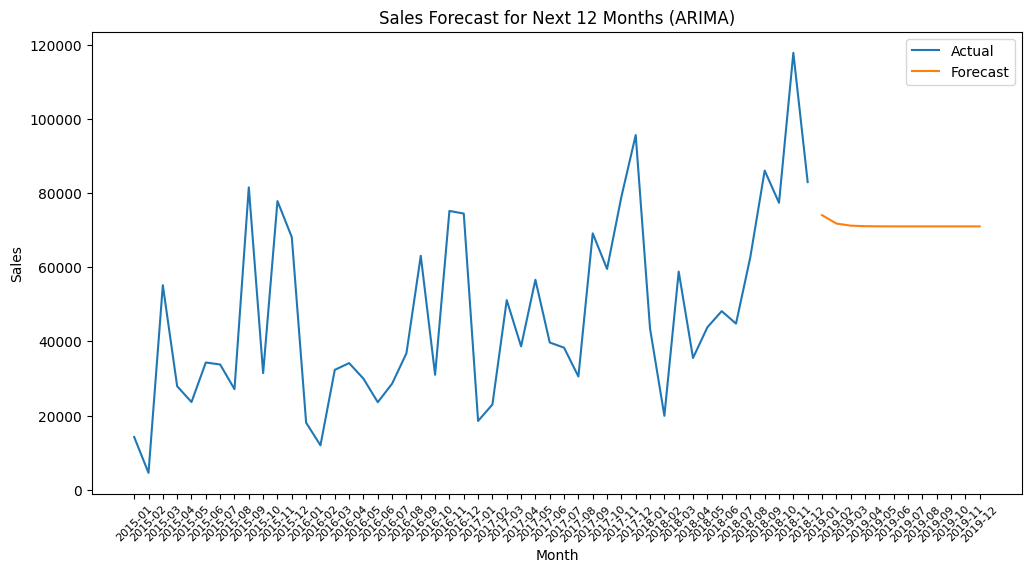

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(ts.index.astype(str), ts, label="Actual")
plt.plot(forecast.index.astype(str), forecast, label="Forecast")
plt.xticks(rotation=45, fontsize=8)
plt.title("Sales Forecast for Next 12 Months (ARIMA)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [ ]:
# Ensure Month column is datetime monthly index
ts = df.groupby("Month")["Sales"].sum()
ts.index = ts.index.to_timestamp()  # convert PeriodIndex → TimestampIndex
ts = ts.sort_index()
ts

,Sales
Month,
2015-01-01,14205.7070
2015-02-01,4519.8920
2015-03-01,55205.7970
2015-04-01,27906.8550
2015-05-01,23644.3030
2015-06-01,34322.9356
2015-07-01,33781.5430
2015-08-01,27117.5365
2015-09-01,81623.5268


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -383.926
Date:                            Sat, 06 Dec 2025   AIC                            777.851
Time:                                    06:17:37   BIC                            785.628
Sample:                                01-01-2015   HQIC                           780.536
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5094      0.234      2.179      0.029       0.051       0.968
ma.L1         -0.9007      0.185   

In [ ]:
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)
forecast

,predicted_mean
2019-01-01,43492.278963
2019-02-01,34805.105234
2019-03-01,69907.412182
2019-04-01,54056.962675
2019-05-01,62749.314938
2019-06-01,60785.067612
2019-07-01,59373.127425
2019-08-01,67417.766188
2019-09-01,96122.694275
2019-10-01,82127.306326


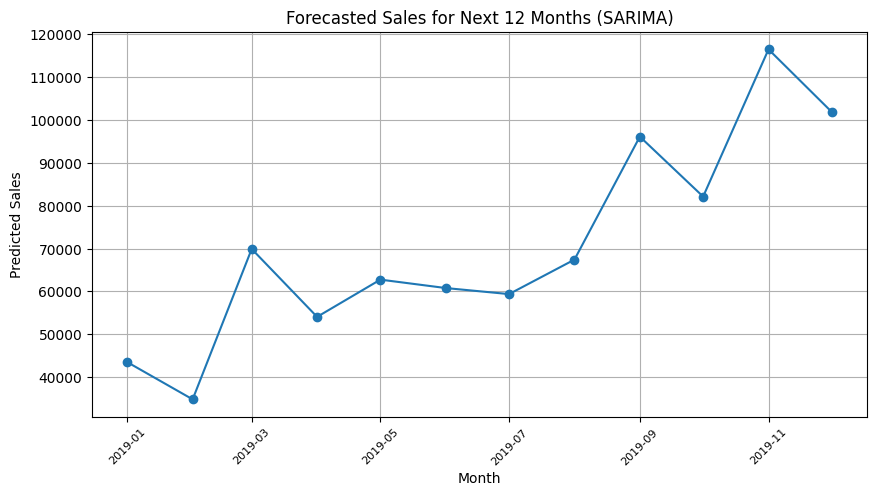

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(forecast.index, forecast, marker='o')
plt.title("Forecasted Sales for Next 12 Months (SARIMA)")
plt.xlabel("Month")
plt.ylabel("Predicted Sales")
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


## 3. Category-Level Revenue Analysis

This section identifies:
- Top revenue-generating categories
- Bar charts for category performance
- Key insights about category contribution to total sales

In [3]:
import pandas as pd
df = pd.read_csv("train.csv")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08-11-2017,11-11-2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12-06-2017,16-06-2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11-10-2016,18-10-2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
cat_revenue = (
    df.groupby("Category")["Sales"]
      .sum()
      .reset_index()
      .rename(columns={"Sales": "Revenue"})
)
cat_revenue


,Category,Revenue
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


In [7]:
top_cat = cat_revenue.sort_values("Revenue", ascending=False)
top_cat

,Category,Revenue
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


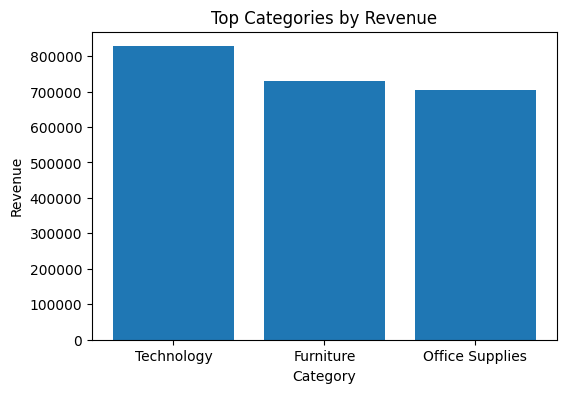

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(top_cat["Category"], top_cat["Revenue"])
plt.title("Top Categories by Revenue")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.show()

In [9]:
# Getting top 3 since you have 3 categories
top1 = top_cat.iloc[0]
top2 = top_cat.iloc[1]
top3 = top_cat.iloc[2]

print(f"1️⃣ The highest-revenue category is **{top1['Category']}** with revenue of **{top1['Revenue']:.2f}**, indicating strong demand and premium pricing potential.")
print(f"2️⃣ The lowest-revenue category is **{top3['Category']}**, but still contributes significantly, suggesting it may benefit from targeted promotions or bundling strategies.")

1️⃣ The highest-revenue category is **Technology** with revenue of **827455.87**, indicating strong demand and premium pricing potential.
2️⃣ The lowest-revenue category is **Office Supplies**, but still contributes significantly, suggesting it may benefit from targeted promotions or bundling strategies.


## 4. Product-Level Revenue Analysis

This section includes:
- Top 5 revenue-generating products
- Visualizations (horizontal bar chart)
- Insights about product performance and demand concentration

In [11]:
product_revenue = (
    df.groupby("Product Name")["Sales"]
      .sum()
      .reset_index()
      .rename(columns={"Sales": "Revenue"})
)

product_revenue.head()

,Product Name,Revenue
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",379.214
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672


In [20]:
top_products = product_revenue.sort_values("Revenue", ascending=False).head(5)
top_products

,Product Name,Revenue
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479


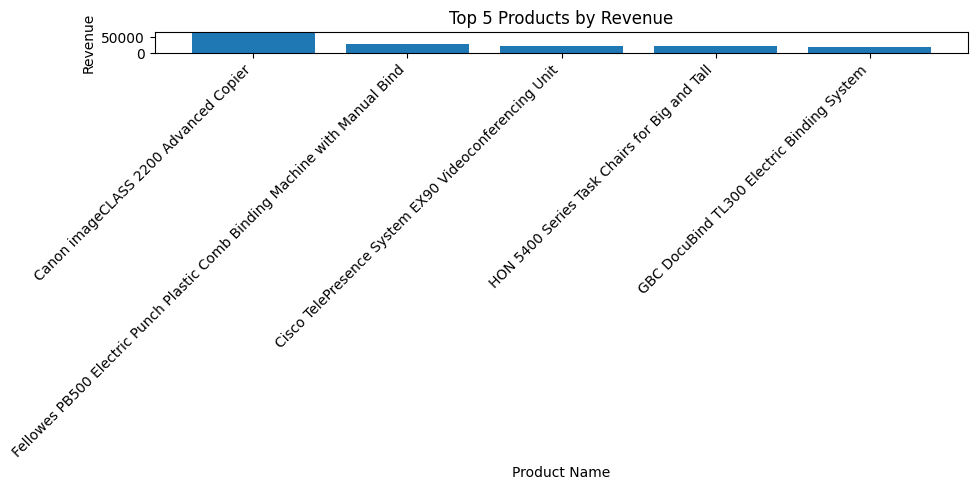

In [16]:
plt.figure(figsize=(10,5))
plt.bar(top_products["Product Name"], top_products["Revenue"])
plt.title("Top 5 Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

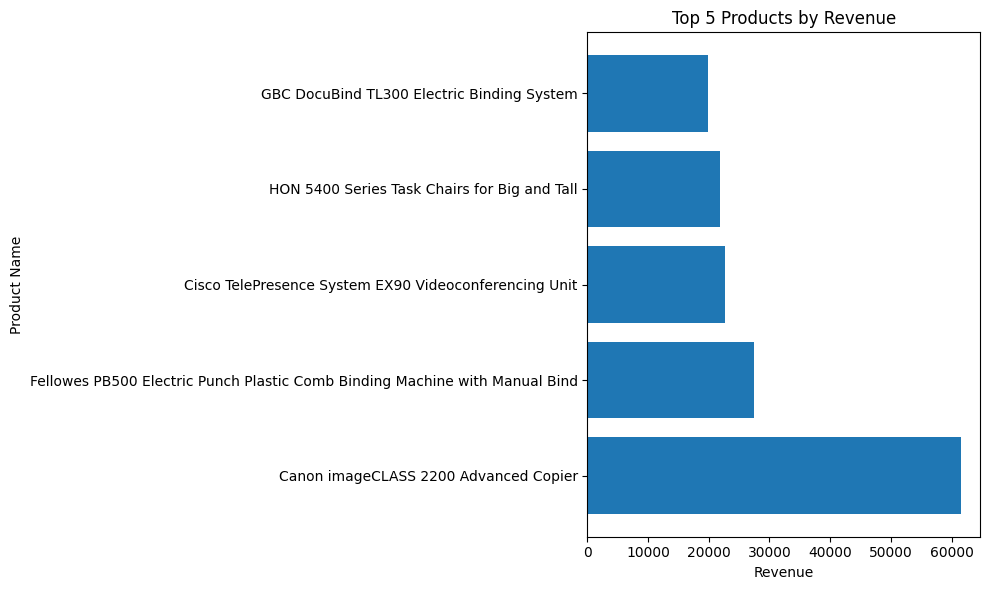

In [25]:
plt.figure(figsize=(10,6))
plt.barh(top_products["Product Name"], top_products["Revenue"])
plt.title("Top 5 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

In [26]:
# Top product
top_p = top_products.iloc[0]
second_p = top_products.iloc[1]

print(f"1️⃣ The highest-revenue product is **{top_p['Product Name']}**, generating **{top_p['Revenue']:.2f}** in sales. This product is a major revenue driver and should be prioritized for inventory and promotion.")

print(f"2️⃣ The second-highest product, **{second_p['Product Name']}**, also shows strong performance, indicating consistent demand in this category.")

1️⃣ The highest-revenue product is **Canon imageCLASS 2200 Advanced Copier**, generating **61599.82** in sales. This product is a major revenue driver and should be prioritized for inventory and promotion.
2️⃣ The second-highest product, **Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind**, also shows strong performance, indicating consistent demand in this category.


## 5. Key Insights & Business Recommendations

### 🔹 Monthly Sales Insights

- The best-selling month across all years was **November**, with revenue of **$350161**.

- Consistently low-performing month was **February**, with revenue of **$59371**.
- Year-over-year growth from 2016 → 2017 was **+30.64%**  and 2017 → 2018 was **+20.3%**.

### 🔹 Forecasting Insights
- SARIMA forecast predicts a peak in **November 2019** with expected sales of **$116492**.

- ARIMA was less accurate, producing flatter forecasts.
- Overall next-year projected sales amount to **$849,197**.

### 🔹 Category-Level Insights
- The top-performing category was **Technology** with total revenue of **$827,455**.

- The lowest-performing category was **Office Supplies**, but still contributed **$705,422**.

### 🔹 Product-Level Insights
- The highest-revenue product was  **Canon imageCLASS 2200 Advanced Copier** with revenue of **$61599**.

- The second-highest product was **Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Mannual Bind** with revenue of **$27453**.

📌 Final Recommendation
Use these insights to guide:
- Inventory planning  
- Marketing focus  
- Budget allocation  
- Sales target setting